In [1]:
# Imports
import matplotlib
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords # Import the stop word list
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set() # Prettify all matplotlib plots

In [ ]:
# If NLTK is not loaded, download NLTK datasets
nltk.download() 

In [4]:
# Load our training and test datasets
train_df = pd.read_csv('data/train.tsv', delimiter = '\t', encoding = 'utf-8')
test_df = pd.read_csv('data/test.tsv', delimiter = '\t', encoding = 'utf-8')
sample_submission_df = pd.read_csv('data/sampleSubmission.csv', delimiter = ',', encoding = 'utf-8')

# Get some basic info
print("Train data dimensions: " + str(train_df.shape))
print("Train columns: " + str(train_df.columns.values))
print("Test data dimensions: " + str(test_df.shape))
print("Test columns: " + str(test_df.columns.values))
print("Sample submission data dimensions: " + str(sample_submission_df.shape))
print("Sample submission columns: " + str(sample_submission_df.columns.values))

Train data dimensions: (156060, 4)
Train columns: ['PhraseId' 'SentenceId' 'Phrase' 'Sentiment']
Test data dimensions: (66292, 3)
Test columns: ['PhraseId' 'SentenceId' 'Phrase']
Sample submission data dimensions: (66292, 2)
Sample submission columns: ['PhraseId' 'Sentiment']


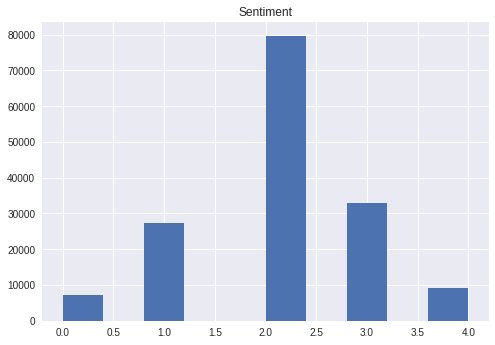

In [5]:
# Visualize the distribution of our dataset in sentiment.
train_df.hist(column = "Sentiment")
plt.show()

In [10]:
# Create a new column with the word count evaluated
train_df['phrase_length'] = train_df['Phrase'].str.len()

In [12]:
stops = set(stopwords.words("english")) 

def clean_df(df):
    df['phrase_cleaned'] = df['Phrase'].str.lower() # Lowercases the strings
    df['phrase_cleaned'] = df['phrase_cleaned'].str.split().apply(lambda x: " ".join([item for item in x if item not in stops]))
    
clean_df(train_df)

In [13]:
print(train_df['Phrase'][0])
print(train_df['phrase_cleaned'][0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = "word", \
    tokenizer = None, \
    preprocessor = None, \
    stop_words = None, \
    max_features = 5000)

train_data_features = vectorizer.fit_transform(train_df['phrase_cleaned']).toarray()
print(train_data_features.shape)

(156060, 5000)


In [16]:
# Take a look at the words in the vocabulary
vocab = np.array(vectorizer.get_feature_names())

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

dist_sort_idxs = dist.argsort()[::-1]
dist = dist[dist_sort_idxs]
vocab = vocab[dist_sort_idxs]

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

6733 film
6241 movie
3784 one
3190 like
2539 story
2438 rrb
2261 good
2098 lrb
1919 time
1882 characters
1872 much
1813 comedy
1718 life
1624 even
1605 little
1583 funny
1535 well
1529 way
1414 make
1345 movies
1338 director
1324 love
1305 new
1305 bad
1272 work
1253 enough
1218 us
1198 made
1180 old
1170 action
1168 two
1160 something
1151 would
1123 best
1114 never
1094 many
1073 people
1027 self
1019 makes
1018 character
997 world
992 first
986 may
985 see
985 plot
979 films
977 drama
969 could
920 better
917 audience
907 long
897 look
895 big
892 re
888 really
888 sense
884 man
881 feel
872 without
871 real
864 great
859 every
856 humor
826 screen
819 year
818 another
812 ever
811 minutes
810 get
789 hollywood
772 still
765 performances
760 cast
759 fun
750 human
725 family
724 nothing
718 hard
714 heart
712 less
710 performance
704 often
698 might
695 american
687 things
684 far
683 kind
667 moments
664 script
660 acting
659 seen
659 also
657 back
655 end
649 interesting
648 origi

134 equally
134 friendship
134 wish
134 promise
134 sincere
133 computer
133 bizarre
133 upon
133 loss
133 read
133 sports
133 forget
133 force
132 substance
132 believable
132 sophisticated
132 greatest
132 fit
132 non
132 damned
131 telling
131 grant
131 anti
131 happen
131 spiritual
131 slight
131 masterpiece
131 deal
131 witty
130 funnier
130 directors
130 slapstick
130 queen
130 ability
130 20
130 festival
130 weird
130 means
130 among
130 alone
130 joke
130 steven
130 key
130 typical
130 sensitive
130 franchise
130 release
129 treatment
129 twisted
129 intrigue
129 watchable
129 chan
129 utterly
128 waste
128 provocative
128 industry
128 shallow
128 conventional
128 ms
128 meditation
128 no
128 tedious
127 number
127 manipulative
127 cause
127 foreign
127 science
126 figure
126 rate
126 ages
126 endearing
126 effective
126 south
126 standard
126 sandler
126 lacking
125 central
125 terms
125 society
125 usually
125 chemistry
125 drag
125 deserves
124 amount
124 artistic
124 wise
1

68 insights
68 slap
68 represents
68 order
68 victims
68 brand
68 teeth
67 cleverly
67 looked
67 sane
67 poignancy
67 roll
67 positive
67 technology
67 kiddie
67 broomfield
67 resonance
67 resonant
67 cheek
67 deserve
67 stunt
67 catch
67 soldiers
67 warning
67 blown
67 pair
67 thick
67 lousy
67 happiness
67 sand
67 lyrical
67 charismatic
67 nonsense
67 engaged
67 accessible
66 variety
66 greek
66 thrill
66 hong
66 daughter
66 ghetto
66 strain
66 happening
66 irish
66 roles
66 addition
66 players
66 pick
66 80
66 roots
66 quirks
66 equivalent
66 dignity
66 respectable
66 sentiment
66 reasonably
66 resist
65 afraid
65 importance
65 cell
65 demands
65 cautionary
65 carried
65 merit
65 parody
65 eccentric
65 shadows
65 accomplished
65 west
65 trek
65 offbeat
65 banal
65 utter
65 connection
65 note
65 marriage
65 kill
65 leaden
65 tears
65 considered
65 current
65 buoyant
65 spears
65 halfway
65 fourth
65 reign
65 friendly
65 frustration
64 midnight
64 substantial
64 return
64 books
64 moo

46 alienation
46 whale
46 palma
46 lightweight
46 rohmer
46 reluctant
46 blame
46 skip
46 miller
46 longing
46 sentence
46 stereotypical
46 pro
46 survive
46 philosophy
46 angle
46 shifting
46 3000
46 sobering
46 breezy
46 accent
45 barrel
45 building
45 church
45 firing
45 suburban
45 morality
45 lie
45 antics
45 incisive
45 protagonists
45 hanks
45 fellow
45 rocky
45 subculture
45 argue
45 stylized
45 shower
45 plots
45 pokemon
45 indians
45 minimalist
45 speaks
45 shape
45 mad
45 anger
45 honesty
45 spike
45 holm
45 gifts
45 childlike
45 slackers
45 thrillers
45 cops
45 produce
45 idiosyncratic
45 menace
45 reminds
45 fable
45 heroes
45 lit
45 critics
45 producers
45 venture
45 static
45 scooby
45 yesterday
45 insanely
45 section
45 kline
45 combined
45 brooklyn
45 tech
45 dare
45 ranks
45 soft
45 dozen
45 parable
45 goodfellas
45 admittedly
45 51
45 student
45 nicholson
44 understated
44 gravity
44 mannered
44 scratching
44 web
44 chew
44 sucker
44 brits
44 require
44 altogether
44

33 teeming
33 equilibrium
33 renowned
33 jolt
33 sordid
33 riot
33 telegraphed
33 excesses
33 loyalty
33 supremely
33 exploit
33 nudity
33 notable
33 paints
33 styles
33 mugging
33 payne
33 stick
33 exploiting
33 stephen
33 truthful
33 monsoon
33 expert
33 minimum
33 michel
33 policy
33 spots
33 spotlight
33 uncertain
33 robinson
33 obsessive
33 size
33 threadbare
33 unintentional
33 heist
33 tour
33 shockingly
33 historically
33 hall
33 humorless
33 grim
33 hewitt
33 gantz
33 tragically
33 gosling
33 snake
33 salt
33 frantic
33 rushed
33 genius
33 gory
33 sister
33 inviting
33 sits
33 hilarity
33 endurance
32 suggest
32 farcical
32 characteristic
32 higher
32 medium
32 develops
32 melt
32 train
32 catches
32 suffered
32 haynes
32 moved
32 subtext
32 dana
32 gleaned
32 graceless
32 narratively
32 gosford
32 stupidity
32 tones
32 bros
32 brilliantly
32 hippie
32 destructive
32 feelings
32 considering
32 lanes
32 inescapable
32 waking
32 flip
32 kosashvili
32 collision
32 fool
32 marvel


26 shoddy
26 environmental
26 slapping
26 dustin
26 95
26 review
26 acerbic
26 above
26 smith
26 awake
26 schaeffer
26 argument
26 rage
26 plotline
26 affleck
26 scorn
26 afterlife
26 rug
26 undercover
26 aggrandizing
26 displays
26 whodunit
26 raymond
26 sacrificing
26 playwright
26 wire
26 piccoli
26 adrenaline
26 william
26 egoyan
26 spice
26 bette
26 seemed
26 whiny
26 autobiographical
26 phrase
26 records
26 adequately
26 uninteresting
26 undone
26 satiric
26 smirk
26 sporadic
26 gong
26 generating
26 canadian
26 contribution
26 minimal
26 twaddle
26 conveying
26 convictions
26 losers
26 forward
26 weary
26 thematically
26 months
26 demme
26 mountain
26 dependent
26 denied
26 fluent
26 killing
26 fade
26 chimps
26 craig
26 crammed
26 internet
26 generosity
26 narrow
26 hitchcock
26 trade
26 chiefly
26 weaknesses
26 impressively
26 condensed
26 intensely
26 charles
26 interviews
26 intellect
26 tenacious
26 insultingly
26 supply
26 confront
26 frills
26 mamet
26 tuck
26 maintaining

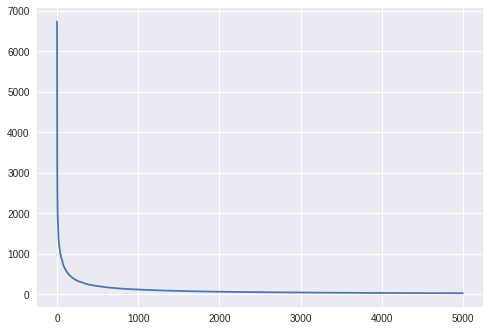

In [17]:
plt.plot(dist)
plt.show()

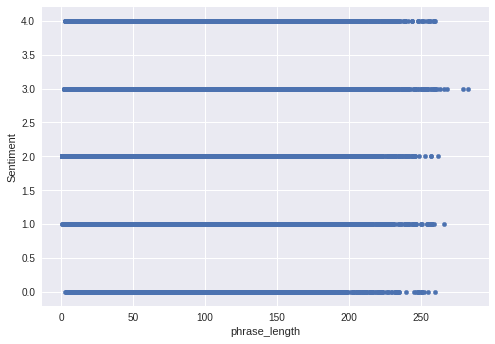

In [18]:
# Plot Sentiment vs phrase_length
train_df.plot(x='phrase_length', y='Sentiment', style='o', kind='scatter')
plt.show()

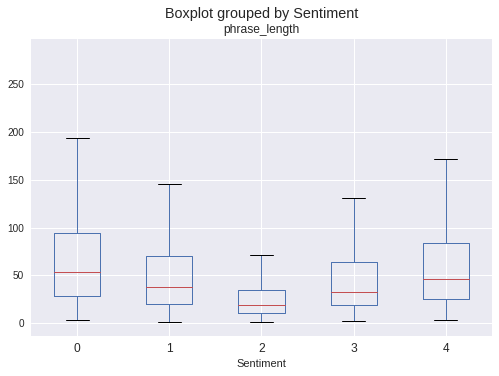

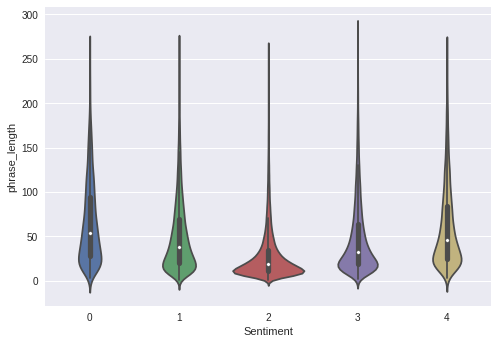

In [19]:
# That wasn't very helpful. Let's try a box plot instead.
train_df.boxplot(column='phrase_length', by='Sentiment')
plt.show()

ax = sns.violinplot(x="Sentiment", y="phrase_length", data=train_df)
plt.show()

Visualizing the phrase length along a sentiment reveals that neutral sentiment phrases are typically shorter and low-variance.

In [26]:
# bins = [0, 25, 50, 75, 100]
# categories = pd.cut(train_df['phrase_length'], bins)

std = train_df['phrase_length'].std()
std

38.154129861956434

In [27]:
# Split our data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(['Sentiment'], axis = 1), 
    train_df['Sentiment'], 
    test_size = 0.2, 
    random_state = 42)

In [28]:
# Define a super basic model that only returns neutral sentiment
class NaiveModel():
    def predict(self, phrases):
        return np.full((len(phrases), 1), 2)

In [29]:
# Use the naive model to run a predication on our cross validation dataset
naive_model = NaiveModel()
predictions = naive_model.predict(train_df['Phrase'])
print(len(predictions))

156060


In [40]:
def print_metrics(predictions, actual):
    # With these, we now have a basic benchmark that we want to outperform
    print("Accuracy: " + str(metrics.accuracy_score(actual, predictions)))
    print(metrics.classification_report(actual, predictions))

print_metrics(predictions, train_df['Sentiment'])

Accuracy: 0.50994489299
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7072
          1       0.00      0.00      0.00     27273
          2       0.51      1.00      0.68     79582
          3       0.00      0.00      0.00     32927
          4       0.00      0.00      0.00      9206

avg / total       0.26      0.51      0.34    156060



/home/hdavidzhu/miniconda3/envs/ml_is/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, verbose=3, n_jobs=-1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, train_df["Sentiment"])

Training the random forest...
building tree 4 of 100building tree 5 of 100building tree 7 of 100building tree 9 of 100building tree 13 of 100building tree 1 of 100building tree 25 of 100building tree 26 of 100building tree 6 of 100building tree 8 of 100building tree 10 of 100building tree 11 of 100building tree 27 of 100building tree 15 of 100building tree 17 of 100building tree 18 of 100building tree 21 of 100building tree 31 of 100building tree 32 of 100building tree 33 of 100building tree 34 of 100building tree 12 of 100building tree 14 of 100building tree 19 of 100building tree 36 of 100building tree 3 of 100building tree 16 of 100building tree 42 of 100building tree 28 of 100building tree 24 of 100building tree 45 of 100building tree 2 of 100building tree 20 of 100building tree 43 of 100building tree 44 of 100building tree 29 of 100building tree 46 of 100building tree 49 of 100building tree 50 of 100building tree 51 of 100building tree 35 of 100building tree 22 of 100building tree

[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:  9.0min remaining: 72.5min
[Parallel(n_jobs=-1)]: Done  45 out of 100 | elapsed:  9.0min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  9.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.7min finished


In [34]:
from sklearn.externals import joblib
joblib.dump(forest, 'forest_v1_170430.pkl')

['forest_v1_170430.pkl']

In [38]:
forest_predictions = forest.predict(train_data_features)

[Parallel(n_jobs=96)]: Done  11 out of 100 | elapsed:    2.3s remaining:   18.4s
[Parallel(n_jobs=96)]: Done  45 out of 100 | elapsed:    2.7s remaining:    3.2s
[Parallel(n_jobs=96)]: Done  79 out of 100 | elapsed:    3.1s remaining:    0.8s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    4.6s finished


In [42]:
print_metrics(forest_predictions, train_df['Sentiment'])

Accuracy: 0.80594643086
             precision    recall  f1-score   support

          0       0.77      0.67      0.72      7072
          1       0.78      0.68      0.73     27273
          2       0.82      0.91      0.86     79582
          3       0.80      0.71      0.75     32927
          4       0.81      0.69      0.74      9206

avg / total       0.80      0.81      0.80    156060



In [47]:
# Preprocessing submission data
clean_df(test_df)

# Use model to predict results
test_data_features = vectorizer.fit_transform(test_df['phrase_cleaned']).toarray()
test_forest_predictions = forest.predict(test_data_features)

[Parallel(n_jobs=96)]: Done  11 out of 100 | elapsed:    1.3s remaining:   10.4s
[Parallel(n_jobs=96)]: Done  45 out of 100 | elapsed:    1.5s remaining:    1.8s
[Parallel(n_jobs=96)]: Done  79 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=96)]: Done 100 out of 100 | elapsed:    2.2s finished


In [49]:
# Save output to csv for submission
# print(test_forest_predictions.shape)
test_df['Sentiment'] = test_forest_predictions

In [52]:
submission_df = test_df[['PhraseId', 'Sentiment']].copy()
submission_df.to_csv(path_or_buf='data/submission_01.csv', index=False)

After submitting to Kaggle, we got back `0.43603` as our accuracy. This was pretty dissapointing, considering the `0.80594643086` accuracy on our training dataset. Our random forest is significantly overfit on the training data, and I think this is because we are using too many features.

Moving forward, let's try reducing the vocabulary size and gear it more towards highly positive and negative reviews.

## Sources

* Naive Bayes tutorial: https://www.youtube.com/watch?v=rISOsUaTrO4